# Assignment No-7

Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.

Data Description:
Murder -- Muder rates in different places of United States

Assualt- Assualt rate in different places of United States

UrbanPop - urban population in different places of United States

Rape - Rape rate in different places of United States

In [1]:
#importing & installing packages & libraries 

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [2]:
df = pd.read_csv("crime_data.csv")

In [3]:
df1 = df.copy()

In [4]:
df1

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [5]:
df1.columns = ['City','Murder' , 'Assault', 'Urbanpop','Rape']

In [6]:
df1.loc[:,'Total'] = df1.sum(numeric_only=True, axis=1) # adding one more column with some of all the remaining column

In [7]:
df1.head()

,City,Murder,Assault,Urbanpop,Rape,Total
0,Alabama,13.2,236,58,21.2,328.4
1,Alaska,10.0,263,48,44.5,365.5
2,Arizona,8.1,294,80,31.0,413.1
3,Arkansas,8.8,190,50,19.5,268.3
4,California,9.0,276,91,40.6,416.6


In [8]:
df1.describe()

,Murder,Assault,Urbanpop,Rape,Total
count,50.00000,50.000000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000,265.320000
std,4.35551,83.337661,14.474763,9.366385,98.350844
min,0.80000,45.000000,32.000000,7.300000,93.400000
25%,4.07500,109.000000,54.500000,15.075000,187.950000
50%,7.25000,159.000000,66.000000,20.100000,257.450000
75%,11.25000,249.000000,77.750000,26.175000,348.500000
max,17.40000,337.000000,91.000000,46.000000,462.300000


The above table provides the mean, median and different quartile values for all the columns in the data set

## Finding the number of required clusters

In [9]:
X = df1[['Murder', 'Assault', 'Rape', 'Urbanpop']]

In [10]:
df1_norm = preprocessing.scale(X) # standardizing the data set

In [11]:
df1_norm = pd.DataFrame(df1_norm) #converting the standardized data from array to dataframe 

In [12]:
df1_norm.head()

,0,1,2,3
0,1.255179,0.790787,-0.003451,-0.526195
1,0.513019,1.118060,2.509424,-1.224067
2,0.072361,1.493817,1.053466,1.009122
3,0.234708,0.233212,-0.186794,-1.084492
4,0.281093,1.275635,2.088814,1.776781


## Undertaking Elbow plot to understand the K value

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are les

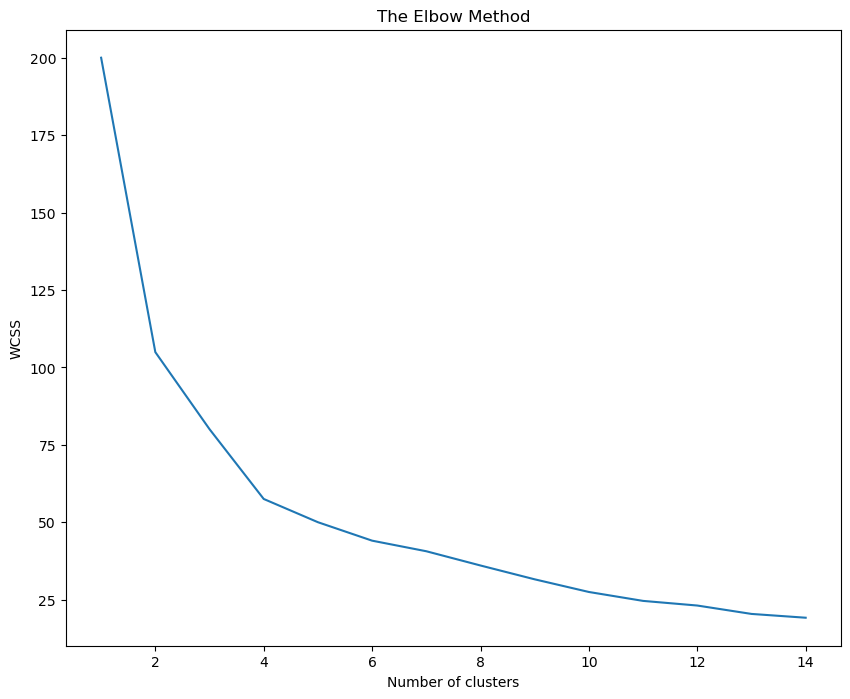

In [13]:
plt.figure(figsize=(10, 8))
wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df1_norm)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 15), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

the above plot levels off at k=4, lets use it to determine the clusters

## Hierarchical Clustering 

Hierarchical clustering is another unsupervised machine learning algorithm, which is used to group the unlabeled datasets into a cluster and also known as hierarchical cluster analysis or HCA.

In this algorithm, we develop the hierarchy of clusters in the form of a tree, and this tree-shaped structure is known as the dendrogram.

Sometimes the results of K-means clustering and hierarchical clustering may look similar, but they both differ depending on how they work. As there is no requirement to predetermine the number of clusters as we do in the K-Means algorithm.

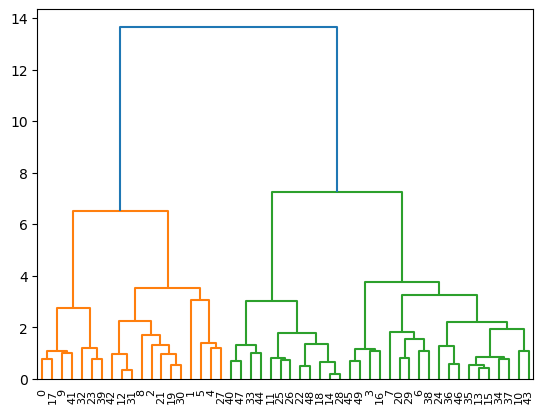

In [14]:
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(df1_norm, method='ward'))

We will cut the tree at 5, so the number of clusters will be 3

In [15]:
X = df1_norm.values

In [16]:
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')

In [17]:
h_cluster = model.fit(X)

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [18]:
labels = model.labels_

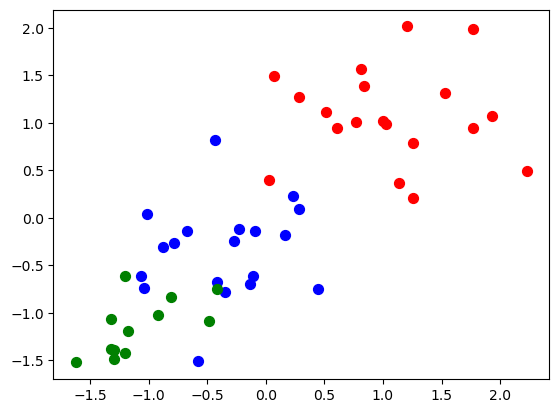

In [19]:
plt.scatter(X[labels==0, 0], X[labels==0, 1], s=50, marker='o', color='red')
plt.scatter(X[labels==1, 0], X[labels==1, 1], s=50, marker='o', color='blue')
plt.scatter(X[labels==2, 0], X[labels==2, 1], s=50, marker='o', color='green')

# K-Means

K-Means Clustering is an Unsupervised Machine Learning algorithm, which groups the unlabeled dataset into different clusters.

In [20]:
from sklearn.cluster import KMeans

In [21]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
k_means = kmeans.fit_predict(df1_norm)

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [22]:
k_means1=k_means+1
k_cluster = list(k_means1)

In [23]:
df1['k_cluster'] = k_cluster

In [24]:
kmeans_mean_cluster = pd.DataFrame(round(df1.groupby('k_cluster').mean(),1))

C:\Users\DELL\AppData\Local\Temp\ipykernel_15372\2903323120.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  kmeans_mean_cluster = pd.DataFrame(round(df1.groupby('k_cluster').mean(),1))


In [25]:
kmeans_mean_cluster

,Murder,Assault,Urbanpop,Rape,Total
k_cluster,,,,,
1,5.7,138.9,73.9,18.8,237.2
2,12.2,255.2,68.4,29.2,365.0
3,4.0,86.5,51.9,12.7,155.1


In [26]:
pd.DataFrame(round(df1.groupby('k_cluster').count(),1))

,City,Murder,Assault,Urbanpop,Rape,Total
k_cluster,,,,,,
1,16,16,16,16,16,16
2,20,20,20,20,20,20
3,14,14,14,14,14,14


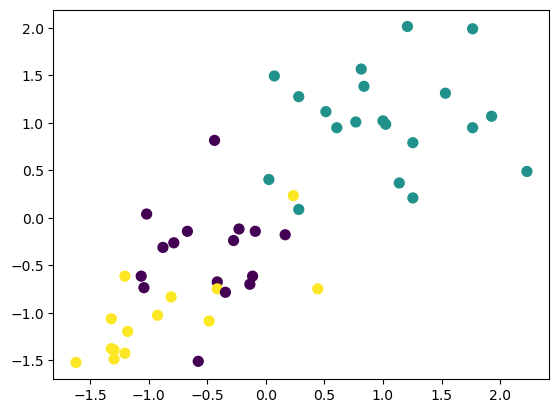

In [27]:

plt.scatter(X[:, 0], X[:, 1], c=k_means, s=50, cmap='viridis')

## DBSCAN

DBSCAN stands for Density-Based Spatial Clustering Application with Noise. It is an unsupervised machine learning algorithm that makes clusters based upon the density of the data points or how close the data is. That said, the points which are outside the dense regions are excluded and treated as noise or outliers. This characteristic of the DBSCAN algorithm makes it a perfect fit for outlier detection and making clusters of arbitrary shape. The algorithms like K-Means Clustering lack this property and make spherical clusters only and are very sensitive to outliers.

In [30]:
#Import the libraries
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [34]:
array = pd.DataFrame(df1.values)
array

,0,1,2,3,4,5,6
0,Alabama,13.2,236,58,21.2,328.4,2
1,Alaska,10.0,263,48,44.5,365.5,2
2,Arizona,8.1,294,80,31.0,413.1,2
3,Arkansas,8.8,190,50,19.5,268.3,3
4,California,9.0,276,91,40.6,416.6,2
5,Colorado,7.9,204,78,38.7,328.6,2
6,Connecticut,3.3,110,77,11.1,201.4,1
7,Delaware,5.9,238,72,15.8,331.7,1
8,Florida,15.4,335,80,31.9,462.3,2
9,Georgia,17.4,211,60,25.8,314.2,2


In [37]:
stscaler = StandardScaler()
X = stscaler.fit_transform(array.iloc[:,1:])

In [38]:
dbscan = DBSCAN(eps=2, min_samples=3)
dbscan.fit_predict(X)

array([ 0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
      dtype=int64)

In [39]:
#Noisy samples are given the label -1.
dbscan.labels_

array([ 0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
      dtype=int64)

In [40]:
df1['cluster']=dbscan.labels_
df1.head()

,City,Murder,Assault,Urbanpop,Rape,Total,k_cluster,cluster
0,Alabama,13.2,236,58,21.2,328.4,2,0
1,Alaska,10.0,263,48,44.5,365.5,2,-1
2,Arizona,8.1,294,80,31.0,413.1,2,0
3,Arkansas,8.8,190,50,19.5,268.3,3,0
4,California,9.0,276,91,40.6,416.6,2,0


1 - The above result shows that Higher the murder rates in a city higer the assaults and vice versa

2 = Contrary to murders and assaults, there is much more spread among the clusters when comparing murders and rapes. Some correlation is visible, but low murder rates in a city seem to indicate lower number of rapes and vice versa

3 - Also rates of rape and assault show clearer correlations